In [101]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from trend_vis import trend_vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
data_size = 100_000

a = np.cumsum(np.random.randn(data_size))
b = np.cumsum(np.random.randn(data_size))

In [4]:
dates = pd.date_range(start="2021-01-04", periods=data_size, freq="1min")

df = pd.DataFrame(a, index=dates, columns=["a"])
df['b'] = b
df['c'] = np.cumsum(np.random.randn(data_size)*np.random.rand(data_size))
df['d'] = np.cumsum(np.random.rand(data_size)-0.5)
df['e'] = np.cumsum(np.random.rand(data_size) + (np.random.randn(data_size)-0.5))
df['f'] = a - b

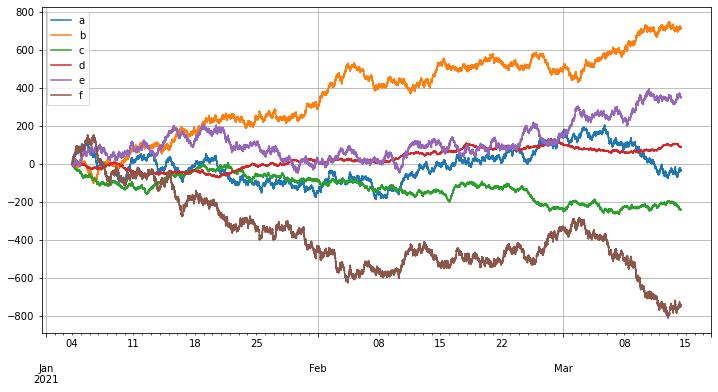

経過時間: 4.02秒


In [10]:
before = time.time()
df.plot(grid=True, figsize=(12, 6))
for_time = time.time() - before
plt.show()
print("経過時間: {:.2f}秒".format(for_time))

## 追加したい機能

### 追加済みの機能
* colorbarをつけたい
* 特定の時間に垂線を入れたい
* 画像を保管したい（png? pdf?)
* labelを右下に表示したい（bestでのOK)
* 補助軸の設定
* xlabelの初期値を決めたい <- dates.drangeを使用

### 諦めた機能

### 別途作る機能
* 同じ図に複数のプロット（同じような変数を見比べる）
* x軸を時間軸以外に（for文で複数のグラフをプロットするもの）
* pdf化専用の関数を作る
* Classをつくる（pdf化などの機能を作る）<<-- 要否は別途判断
* plotly.offlineで描画したい

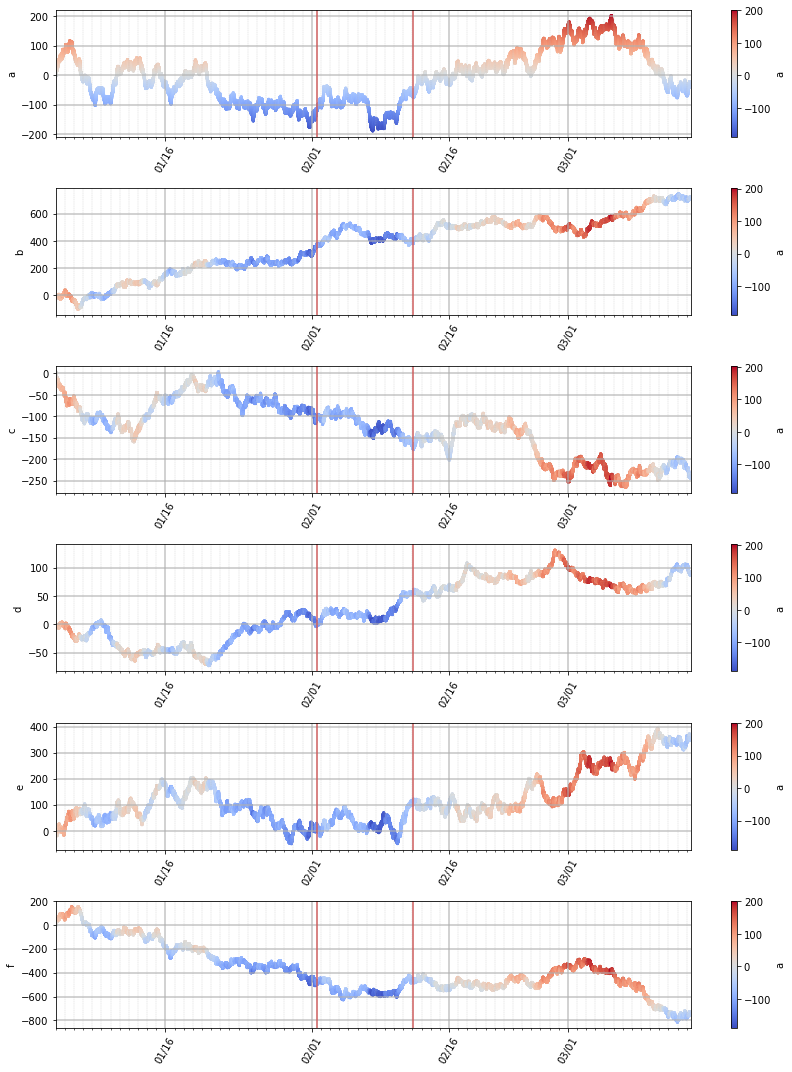

経過時間: 20.37秒


In [111]:
# 必要なライブラリのimport 
from  datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import cm, dates, ticker
from matplotlib.backends.backend_pdf import PdfPages


# setting
# (1) 全体
plot_list = None  # カラム名を指定
fig_save_name = None # None とするか xxxx.png", "xxxx.pdf" のようにファイル名＋拡張子を指定
# fig_save_name = "test.png"
legend_loc = "lower right"  # "matplotlib legend 参照, colorbar付ける場合は表示なし

# (2) グラフの設定
graph_width = 12  # 初期値 12.0
graph_height = 2.5  # 初期値3.0

x_min = None  # datetime.datetime(year, month, day, hour, min)の形で指定. default: None
x_max = None  # datetime.datetime(year, month, day, hour, min)の形で指定. default: None

colorbar_column = 'a' # カラーバーに表示する列を指定 default: None
# colorbar_column = None

# x_major_loc = dates.DayLocator(interval=14, tz=None)  # default: None
x_major_loc = dates.DayLocator(bymonthday=range(1, 31, 15))
# x_major_loc = dates.drange(
#     dstart=df.index.min(),
#     dend=datetime(2021, 3, 1, 0, 0),
#     delta=timedelta(days=7),
# )

# x_major_format = dates.DateFormatter("%m/%d %H:%M")
x_major_format = dates.DateFormatter("%m/%d")  # default: None

x_minor_loc = dates.DayLocator(interval=1, tz=None)  # default: None

# (3) 垂線の設定
ver_line_list = [
    datetime(2021, 2, 1, 12, 25),
    datetime(2021, 2, 12, 1, 30),
]


# 関数内での処理
# (1) setting_全体
if fig_save_name is None:
    is_save_pdf = False
elif fig_save_name.split(".")[-1] == "pdf":
    is_save_pdf = True
    pdf = PdfPages(fig_save_name)
else:
    is_save_pdf = False

## プロット準備
# (1) plot_list = Noneの時にはすべてplot
if plot_list is None:
    plot_list = df.columns

# (2) x軸設定
if x_min is None:
    x_min = df.index.min()
if x_max is None:
    x_max = df.index.max()

    
## グラフ描画
number = len(plot_list)
fig, ax = plt.subplots(number, 1, figsize=(graph_width, graph_height*number))

before = time.time()
for idx, column in enumerate(plot_list):
    # グラフの描画 -- colorbarも
    if colorbar_column is not None:
        mappable = ax[idx].scatter(df.index, df[column], s=4, label=column,
                                   c=df[colorbar_column], cmap="coolwarm")
        cbar = fig.colorbar(mappable, ax = ax[idx])
        cbar.set_label(colorbar_column)
    else:
        ax[idx].plot(df.index, df[column], color=cm.tab10.colors[idx], label=column)
        ax[idx].legend(loc=legend_loc)
    
    # 垂線
    for ver in ver_line_list:
        ax[idx].axvline(x=ver, color='indianred')
    
    # trend表示範囲の設定
    ax[idx].set_xlim(x_min, x_max)
    
    # x軸の設定
    ax[idx].tick_params(axis="x", rotation=60)  # 要望があれば、rotationも変数に格納
    if x_major_loc is not None:
        if type(x_major_loc) == np.ndarray:
            ax[idx].xaxis.set_major_locator(ticker.FixedLocator(x_major_loc))
        else:
            ax[idx].xaxis.set_major_locator(x_major_loc)
    if x_major_format is not None:
        ax[idx].xaxis.set_major_formatter(x_major_format)
    ax[idx].grid(alpha=0.75, linewidth=1.5)
    
    if x_minor_loc is not None:
        ax[idx].xaxis.set_minor_locator(x_minor_loc)
        ax[idx].grid(alpha=0.75, which="minor", ls="--", lw=0.35)

    # y軸ラベルの設定
    ax[idx].set_ylabel(column)
    
plt.tight_layout()
if is_save_pdf:
        pdf.savefig(fig)
if fig_save_name is not None:
    plt.savefig(fig_save_name)
plt.show()

if is_save_pdf:
    pdf.close()


for_time = time.time() - before
print("経過時間: {:.2f}秒".format(for_time))

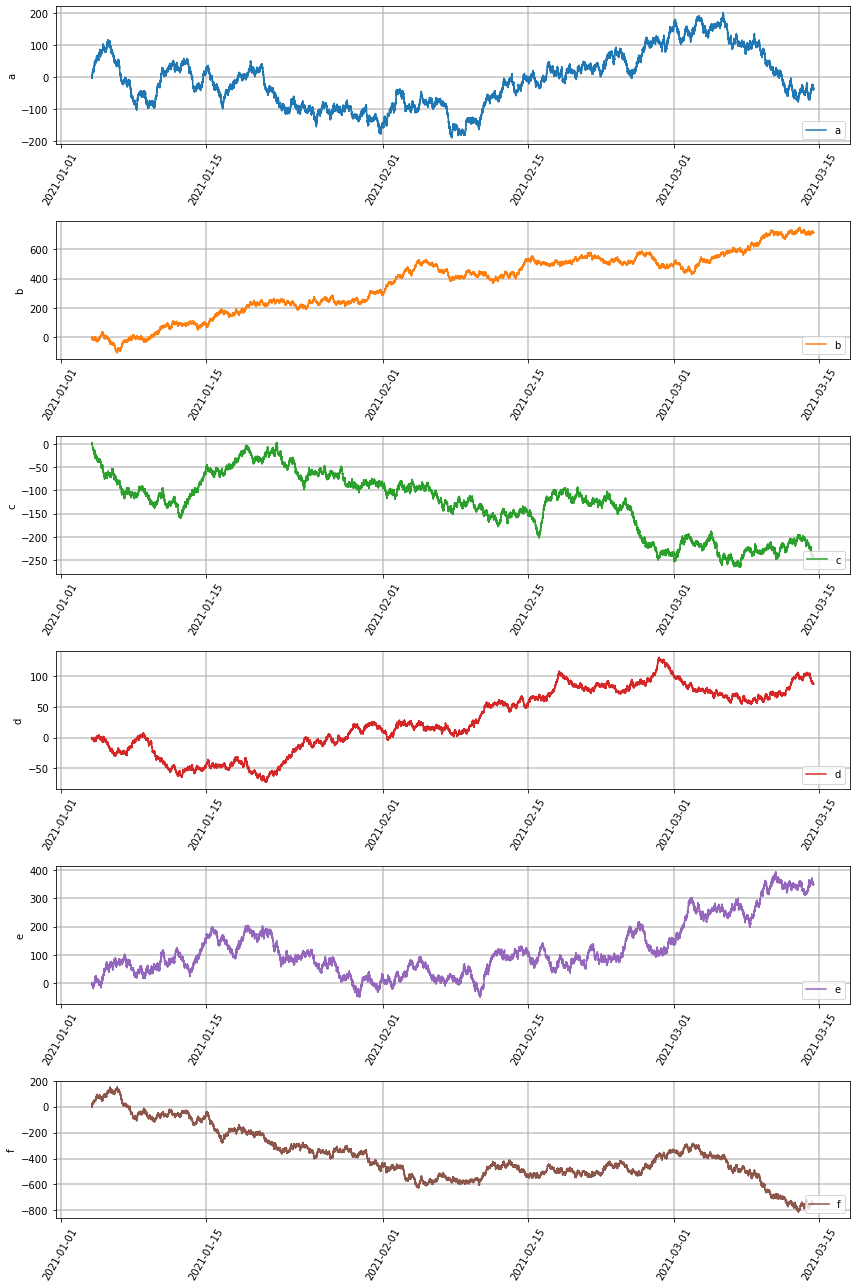

経過時間: 2.03秒


In [110]:
before = time.time()
trend_vis(df, )
for_time = time.time() - before
print("経過時間: {:.2f}秒".format(for_time))

## グラフ毎にpdfに落とし込む
* trend
* scatter_plot(Xとyの関係）

## 関数作成時にテスト的に書いたコード

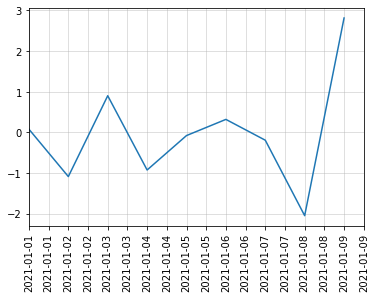

In [57]:
plt.plot(np.arange(start, end, delta), np.random.randn(len(np.arange(start, end, delta))))
xloc = np.arange(start, end, timedelta(hours=12))
plt.xlim([start, end-timedelta(days=1)])
plt.grid(alpha=0.5)
plt.xticks(xloc, rotation=90)
plt.show()
    

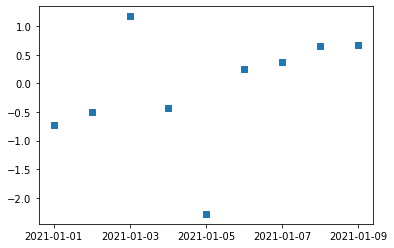

In [70]:
from matplotlib import ticker

fig, ax = plt.subplots()
ax.scatter(np.arange(start, end, delta), np.random.randn(len(np.arange(start, end, delta))), marker="s")
xloc = dates.drange(start, end, timedelta(days=2))
ax.xaxis.set_major_locator(ticker.FixedLocator(xloc))
plt.show()